## Observations and Insights 

In [ ]:
Observations:
    
    There is a positive correlation between weight and tumor volume for mice on Capomulin.  
    The larger the mice are the larger the tumor volume.
    
    Mouse s185 saw an approx. 50% reduction in the tumor volume over the course of the treatment.
    
    Of the four treatements that we focused on (Capomulin, Ramicane, Infubinol, and Ceftamin), 
    Infubinol was the only one with outliers.
    
    

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = ("data/Mouse_metadata.csv")
study_results_path = ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [104]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_cond = mouse_study[mouse_study["Mouse ID"] == 'g989'].index

cleaned_mouse_study = mouse_study.drop(drop_cond)

In [106]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats = cleaned_mouse_study.groupby(["Drug Regimen"])
tv_mean = stats["Tumor Volume (mm3)"].mean()
tv_median = stats["Tumor Volume (mm3)"].median()
tv_var = stats["Tumor Volume (mm3)"].var()
tv_sem = stats["Tumor Volume (mm3)"].sem()
tv_SD =(stats["Tumor Volume (mm3)"].std())


# Assemble the resulting series into a single summary dataframe.
stats_summary_df = pd.DataFrame({"Mean": tv_mean,
                                 "Median": tv_median,
                                 "Variance": tv_var,
                                 "Standard Deviation": tv_SD,
                                "SEM": tv_sem})
stats_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Zoniferol')]

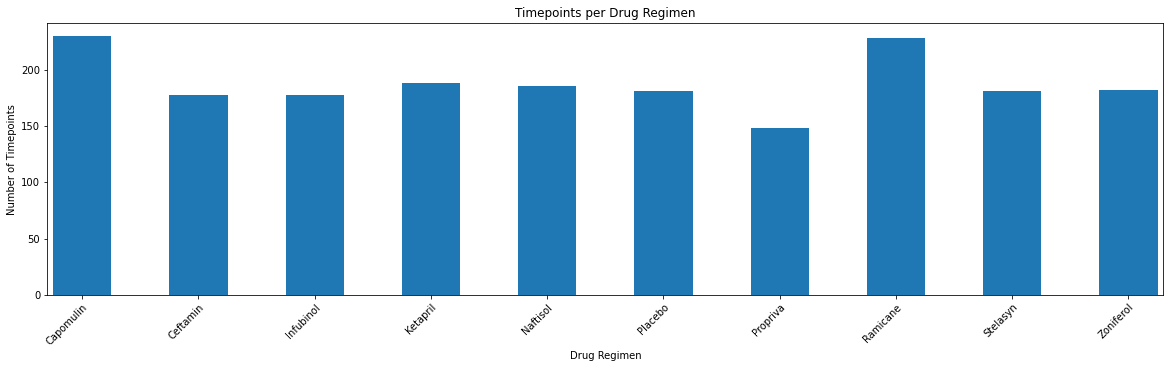

In [109]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
                             
timepoints_per_mouse = stats["Timepoint"].count()
Mouse_bar_chard_pd = timepoints_per_mouse.plot(kind='bar', figsize=(20,5), title="Timepoints per Drug Regimen")

plt.ylabel('Number of Timepoints')


xticklabels = timepoints_per_mouse.index
plt.xlim(-0.3,len(timepoints_per_mouse)-.7)
Mouse_bar_chard_pd.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right")



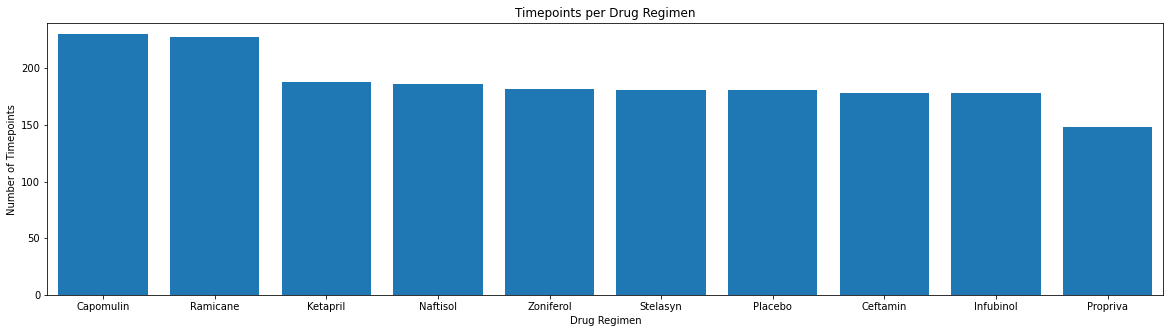

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
number = cleaned_mouse_study["Drug Regimen"].value_counts()

plt.figure(figsize=(20,5))
mouse_bar_chart_py = plt.bar(number.index.values,number.values)



plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Timepoints')
plt.xlim(-.5,len(number.index.values)-.5)
plt.ylim(0,max(number.values)+10)
plt.show()

# plt.bar(timepoints_per_mouse, color='r', alpha=0.5, align="center")

# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

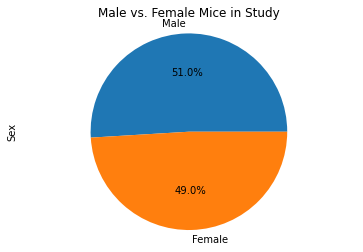

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_mouse = cleaned_mouse_study["Sex"].value_counts()
Sex_mouse.plot(kind='pie', title="Male vs. Female Mice in Study", autopct='%1.1f%%')

plt.axis('equal')


In [125]:
cleaned_mouse_study["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1488b016f88>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

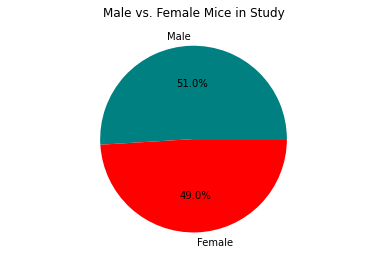

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
numbers = [958, 922]
colors = ["teal", "red"]
plt.title("Male vs. Female Mice in Study")
plt.axis('equal')
plt.tight_layout()
plt.pie(numbers, labels=labels, colors=colors,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_mouse_study.groupby(["Mouse ID"])["Timepoint"].max()

max_tumor = max_tumor.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_mouse_study, on=["Mouse ID", "Timepoint"], how="inner")


In [115]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# # Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:

# # Locate the rows which contain mice on each drug and get the tumor volumes

    final_vol = merged_data.loc[merged_data["Drug Regimen"] == x, "Tumor Volume (mm3)"]
#     # add subset 
    tumor_volume.append(final_vol)
#     # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


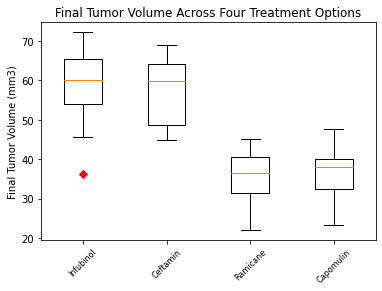

In [116]:
# Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens. 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Treatment Options')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, 0,'rD')
ax1.set_xticklabels(treatments,
                    rotation=45, fontsize=8)

plt.show()

## Line and Scatter Plots

<Figure size 720x360 with 0 Axes>

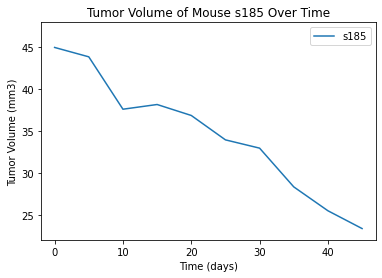

<Figure size 720x360 with 0 Axes>

In [132]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Isolate Mice treated with Capomulin
capomulin_mice = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"]=="Capomulin"]
# select one from the list
selected_mouse = "s185"
selected_mouse_data = cleaned_mouse_study.loc[cleaned_mouse_study["Mouse ID"]== selected_mouse]
time = selected_mouse_data["Timepoint"]
size = selected_mouse_data["Tumor Volume (mm3)"]
plt.plot(time, size)
plt.title(f"Tumor Volume of Mouse {selected_mouse} Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend([f"{selected_mouse}"],loc="best")
plt.xlim(-2,max(time)+2)
plt.ylim(22,max(size)+3)
plt.figure(figsize=(10,5))

C:\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


(14.0, 26.0)

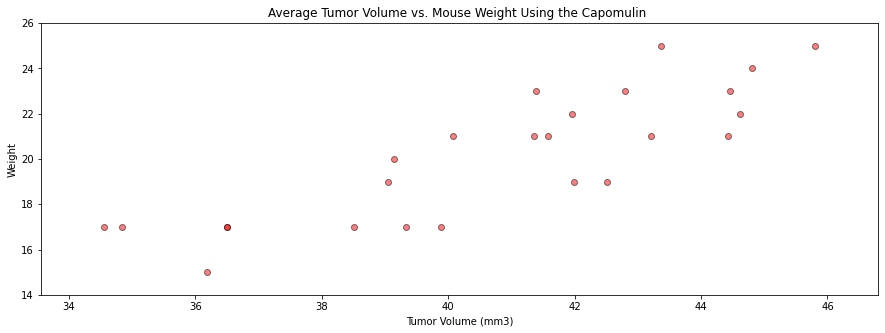

In [153]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Determine average weight and volume
avg_cap = capomulin_mice.groupby(["Mouse ID"])["Tumor Volume (mm3)", "Weight (g)"].mean()

avg_cap = avg_cap.reset_index()
#set variables for datat
capomulin_tumors = avg_cap["Tumor Volume (mm3)"]
capolulin_weight = avg_cap["Weight (g)"]
# Plot and add detail
plt.figure(figsize=(15,5))
plt.scatter(capomulin_tumors, capolulin_weight, marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.ylabel("Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight Using the Capomulin ")
plt.xlim(min(capomulin_tumors)-1,max(capomulin_tumors)+1)
plt.ylim(min(capolulin_weight)-1,max(capolulin_weight)+1)


The correlation between mouse weight and average tumor volume is 0.84


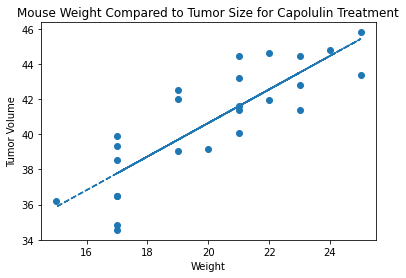

In [151]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capolulin_weight,capomulin_tumors)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(capolulin_weight,capomulin_tumors)
fit = slope * capolulin_weight + intercept
plt.scatter(capolulin_weight,capomulin_tumors)
plt.plot(capolulin_weight,fit,"--")
plt.title("Mouse Weight Compared to Tumor Volume for Capolulin Treatment")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()
